<a href="https://colab.research.google.com/github/AzeemWaqarRao/Pytorch_Implementations/blob/main/Transfer_Learning_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning in Pytorch

## What is Transfer Learning
Transfer learning is a machine learning technique where a model trained on one task is reused or adapted for another related task. Instead of starting the learning process from scratch, the knowledge gained from the original task is transferred to the new task, typically resulting in faster learning and improved performance.

## Code summary
This code utilizes PyTorch framework and employs the VGG16 model, which was originally trained on the ImageNet dataset containing 1000 classes. To retain the knowledge gained from the ImageNet training, all layers of the VGG16 model were frozen. Subsequently, the final layer of the VGG16 model was modified to output only 10 classes.

For demonstration purposes, the CIFAR-10 dataset is used, which consists of images with dimensions of (224, 224) and includes 10 distinct classes.

In [1]:
# Installing Package

!pip install torchsummary

In [2]:
# Necessary Imports

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [17]:
# Setting up constants

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize(mean=MEAN, std=STD)
])

EPOCHS = 5
BATCH_SIZE = 64
STEP_SIZE = 100
CIFAR10_CLASSES = ["airplane" ,"automobile" ,"bird" ,"cat" ,"deer" ,"dog" ,"frog" ,"horse" ,"ship" ,"truck"]

In [18]:
# Helper Functions

def denormalize(img):
  return img * STD + MEAN

def show_img(img):
  img = img.numpy().transpose(1,2,0)
  img = denormalize(img)
  img = np.clip(img, 0, 1)
  plt.imshow(img)

def get_label(x):
  return CIFAR10_CLASSES[label[index]]

In [4]:
# Getting Cifar10 dataset from torchvision

train_data = datasets.CIFAR10(root='./', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./', train=False, transform=transform)

Files already downloaded and verified


In [5]:
# Creating Dataloaders

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [6]:
# Using pretrained VGG16 from torchvision trained on imagenet

model = models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
# Model architecture

model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [8]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [9]:
# Freezing all layers of VGG16

for params in model.parameters():
  params.requires_grad=False

In [10]:
# Replacing last layer of VGG16 with our custom layer to have 10 output nodes

model.classifier[-1] = nn.Sequential(
    nn.Linear(4096, 10),
    nn.LogSoftmax(dim=1)
)

In [12]:
# Altered model architecture

summary(model.to(DEVICE), (3,224,224), batch_size=BATCH_SIZE)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [64, 64, 224, 224]           1,792
              ReLU-2         [64, 64, 224, 224]               0
            Conv2d-3         [64, 64, 224, 224]          36,928
              ReLU-4         [64, 64, 224, 224]               0
         MaxPool2d-5         [64, 64, 112, 112]               0
            Conv2d-6        [64, 128, 112, 112]          73,856
              ReLU-7        [64, 128, 112, 112]               0
            Conv2d-8        [64, 128, 112, 112]         147,584
              ReLU-9        [64, 128, 112, 112]               0
        MaxPool2d-10          [64, 128, 56, 56]               0
           Conv2d-11          [64, 256, 56, 56]         295,168
             ReLU-12          [64, 256, 56, 56]               0
           Conv2d-13          [64, 256, 56, 56]         590,080
             ReLU-14          [64, 256,

In [13]:
# Initializing loss function, optimizer and moving model to GPU

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model = model.to(DEVICE)

In [15]:
# Training loop

for i in range(EPOCHS):

  epoch_loss = 0
  for j, (images, labels) in enumerate(train_loader):
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)

    pred = model(images)
    loss = criterion(pred, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()

    if (j+1) % STEP_SIZE == 0:
      print(f"Epoch: {i+1}/{EPOCHS} -- Step: {j+1}/{len(train_loader)} -- Loss: {loss.item()}")
  print(f"Total loss: {epoch_loss/len(train_loader)}")


Epoch: 1/5 -- Step: 100/782 -- Loss: 0.7129206657409668
Epoch: 1/5 -- Step: 200/782 -- Loss: 0.6474656462669373
Epoch: 1/5 -- Step: 300/782 -- Loss: 0.5856361389160156
Epoch: 1/5 -- Step: 400/782 -- Loss: 0.6141379475593567
Epoch: 1/5 -- Step: 500/782 -- Loss: 0.49082741141319275
Epoch: 1/5 -- Step: 600/782 -- Loss: 0.42837822437286377
Epoch: 1/5 -- Step: 700/782 -- Loss: 0.28308698534965515
Total loss: 0.6563427920079292
Epoch: 2/5 -- Step: 100/782 -- Loss: 0.6967629790306091
Epoch: 2/5 -- Step: 200/782 -- Loss: 0.4110715985298157
Epoch: 2/5 -- Step: 300/782 -- Loss: 0.9137396812438965
Epoch: 2/5 -- Step: 400/782 -- Loss: 0.8930283188819885
Epoch: 2/5 -- Step: 500/782 -- Loss: 0.5280638933181763
Epoch: 2/5 -- Step: 600/782 -- Loss: 0.5575038194656372
Epoch: 2/5 -- Step: 700/782 -- Loss: 0.5367936491966248
Total loss: 0.5957905020174163
Epoch: 3/5 -- Step: 100/782 -- Loss: 0.6489414572715759
Epoch: 3/5 -- Step: 200/782 -- Loss: 0.3152836859226227
Epoch: 3/5 -- Step: 300/782 -- Loss: 0.

In [16]:
# Evaluating model

model.eval()

total = 0
correct = 0

with torch.no_grad():
  for image, label in test_loader:
    image = image.to(DEVICE)
    label = label.to(DEVICE)

    pred = torch.exp(model(image))
    pred = torch.argmax(pred,1)

    total += len(image)
    correct += (pred==label).sum().item()

print(f"Score on Test Data: {(correct * 100)/total}")

Score on Test Data: 83.86


In [19]:
iterator = iter(test_loader)

Actual Label: airplane
Predicted Label: airplane


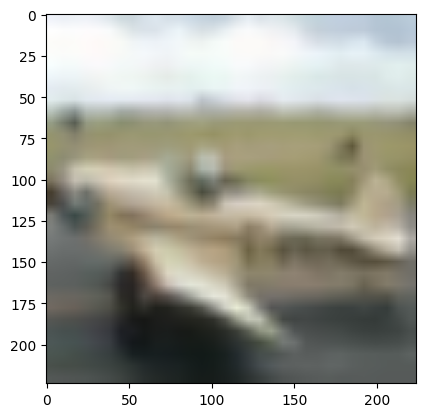

In [24]:
model.eval()

with torch.no_grad():

  image, label = next(iterator)
  image = image.to(DEVICE)
  label = label.to(DEVICE)

  index = np.random.randint(len(labels))
  img = image[index]

  pred = torch.exp(model(img.unsqueeze(0)))
  pred = torch.argmax(pred,1)[0]

  print(f"Actual Label: {get_label(label[index])}")
  print(f"Predicted Label: {get_label(pred)}")
  show_img(img.to('cpu'))